# Out Of Lab Week 10
## December 6th
### Songgun Lee

**Goal** : 

I want to verify the lens formula and plot graphs to find a linear correlation of $1/v$ vs $1/u$.

Starting Time: 19:00


### Plot using measured data

Equation to calculate the mean:
$$ \overline{x} = \frac{1}{N} \sum_{i=1}^{N} x_i $$

Equation to calculate RMSD:
$$ \text{RMSD} = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x} )^2} $$

I used the RMSD to find the uncertainty for v, with the lens having a focal length of 100mm.


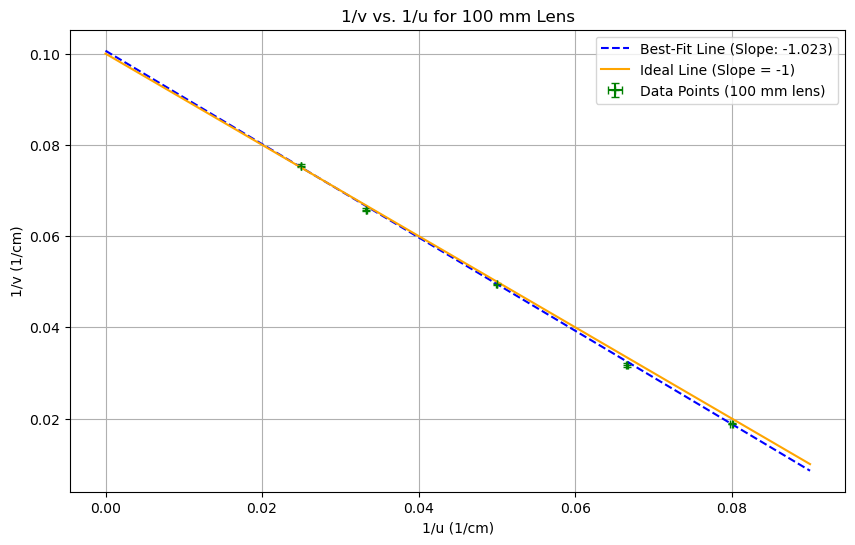

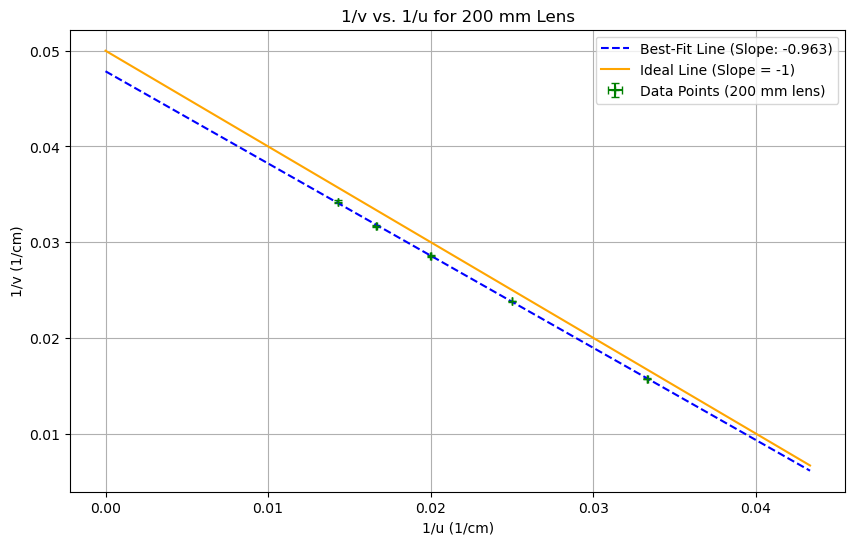

100 mm Lens:
  Slope: -1.023 ± 0.005
  Intercept: 0.1006 ± 0.0003
  Ideal Slope: -1
Ideal y-intercept for 100 mm lens: 0.10 

200 mm Lens:
  Slope: -0.963 ± 0.004
  Intercept: 0.04785 ± 0.00011
  Ideal Slope: -1
Ideal y-intercept for 200 mm lens: 0.05 


In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Focal lengths
f_100 = 10.0  # cm (100 mm)
f_200 = 20.0  # cm (200 mm)

# Data for 100 mm lens
u_100 = np.array([12.5, 15.0, 20.0, 30.0, 40.0])  # cm
v_100 = np.array([
    [53.8, 53.2, 52.8, 53.0, 52.6],
    [32.2, 31.5, 30.7, 31.4, 31.9],
    [20.0, 20.3, 20.3, 20.2, 20.2],
    [15.3, 15.3, 15.2, 15.1, 15.1],
    [13.2, 13.2, 13.3, 13.3, 13.3]
])

# Calculate mean and RMSD for v
v_100_mean = np.mean(v_100, axis=1)
v_100_rmsd = np.sqrt(np.mean((v_100 - v_100_mean[:, np.newaxis])**2, axis=1))

# Data for 200 mm lens
u_200 = np.array([30.0, 40.0, 50.0, 60.0, 70.0])  # cm
v_200 = np.array([63.5, 42.0, 35.0, 31.6, 29.2])  # cm

# Calculate 1/u, 1/v, and their uncertainties
inv_u_100 = 1 / u_100
inv_v_100 = 1 / v_100_mean
inv_u_100_uncertainty = (0.1 / np.sqrt(12)) / u_100**2
inv_v_100_uncertainty = v_100_rmsd / v_100_mean**2

inv_u_200 = 1 / u_200
inv_v_200 = 1 / v_200
inv_u_200_uncertainty = (0.1 / np.sqrt(12)) / u_200**2
inv_v_200_uncertainty = 0.1 / v_200**2  # Assume 0.1 cm uncertainty for single measurement

# Define a linear model
def linear_model(x, slope, intercept):
    return slope * x + intercept

# Fit data for 100 mm lens
params_100, covariance_100 = curve_fit(
    linear_model, inv_u_100, inv_v_100, sigma=inv_v_100_uncertainty, absolute_sigma=True
)
slope_100, intercept_100 = params_100
slope_100_unc, intercept_100_unc = np.sqrt(np.diag(covariance_100))

# Fit data for 200 mm lens
params_200, covariance_200 = curve_fit(
    linear_model, inv_u_200, inv_v_200, sigma=inv_v_200_uncertainty, absolute_sigma=True
)
slope_200, intercept_200 = params_200
slope_200_unc, intercept_200_unc = np.sqrt(np.diag(covariance_200))

# Generate ideal lines
x_values_100 = np.linspace(0, max(inv_u_100) + 0.01, 100)
x_values_200 = np.linspace(0, max(inv_u_200) + 0.01, 100)
ideal_line_100 = linear_model(x_values_100, -1, 1 / f_100)  # Correct slope is -1
ideal_line_200 = linear_model(x_values_200, -1, 1 / f_200)  # Correct slope is -1

# Plot for 100 mm lens
plt.figure(figsize=(10, 6))
plt.errorbar(
    inv_u_100, inv_v_100, xerr=inv_u_100_uncertainty, yerr=inv_v_100_uncertainty,
    fmt='+', color = 'green', capsize=3, label='Data Points (100 mm lens)'
)
plt.plot(x_values_100, linear_model(x_values_100, slope_100, intercept_100), 
         linestyle='--', color='blue', label=f'Best-Fit Line (Slope: {slope_100:.3f})')
plt.plot(x_values_100, ideal_line_100, linestyle='-', color='orange', label='Ideal Line (Slope = -1)')
plt.title('1/v vs. 1/u for 100 mm Lens')
plt.xlabel('1/u (1/cm)')
plt.ylabel('1/v (1/cm)')
plt.grid(True)
plt.legend()
plt.show()

# Plot for 200 mm lens
plt.figure(figsize=(10, 6))
plt.errorbar(
    inv_u_200, inv_v_200, xerr=inv_u_200_uncertainty, yerr=inv_v_200_uncertainty,
    fmt='+', color = 'green', capsize=3, label='Data Points (200 mm lens)'
)
plt.plot(x_values_200, linear_model(x_values_200, slope_200, intercept_200), 
         linestyle='--', color='blue', label=f'Best-Fit Line (Slope: {slope_200:.3f})')
plt.plot(x_values_200, ideal_line_200, linestyle='-', color='orange', label='Ideal Line (Slope = -1)')
plt.title('1/v vs. 1/u for 200 mm Lens')
plt.xlabel('1/u (1/cm)')
plt.ylabel('1/v (1/cm)')
plt.grid(True)
plt.legend()
plt.show()

# Print results
print("100 mm Lens:")
print(f"  Slope: {slope_100:.3f} ± {slope_100_unc:.3f}")
print(f"  Intercept: {intercept_100:.4f} ± {intercept_100_unc:.4f}")
print(f"  Ideal Slope: -1")
print(f"Ideal y-intercept for 100 mm lens: {1 / f_100:.2f} ")

print("\n200 mm Lens:")
print(f"  Slope: {slope_200:.3f} ± {slope_200_unc:.3f}")
print(f"  Intercept: {intercept_200:.5f} ± {intercept_200_unc:.5f}")
print(f"  Ideal Slope: -1")
print(f"Ideal y-intercept for 200 mm lens: {1 / f_200:.2f} ")

# Linearized Form of the Lens Formula:

The lens formula is:

$$ \frac{1}{f} = \frac{1}{u} + \frac{1}{v} $$

Rearranging this to express $$\frac{1}{v}$$ as a linear function of $$\frac{1}{u}$$:

$$ \frac{1}{v} = -\frac{1}{u} + \frac{1}{f} $$

This is in the form of a straight-line equation:

$$y = mx + c$$

where:

$$ y = \frac{1}{v} $$
$$ x = \frac{1}{u} $$
$$ m = -1 $$ (the slope)
$$ c = \frac{1}{f} $$ (the y-intercept)

# Lens Formula Calculations

### 1. Uncertainty in \(1/u\):

$$ \sigma_{1/u_i} = \frac{\sigma_u}{u_i^2}, \quad \sigma_u = \frac{0.1}{\sqrt{12}} $$

I used the uncertainty formula regarding the resolution of the optic board (0.1cm) because I only made one measurement for the u. I never moved the lens around once I fixed it at one point. In other words, I fixed it at a point for each of the 5 measurements. The position of the lens did not have to be moved around once it was fixed.

### 2. Uncertainty in \(1/v\):

$$ \sigma_{1/v_i} = \frac{\sigma_v}{v_i^2} $$

The uncertainty in 1/v is different from the lens with 100mm and 200mm. Since I only made multiple measurements using the 100mm focal length lens, $$\quad\sigma_v$$ uses RMSD for that case and for the 200mm focal length one, $$\quad\sigma_v$$ uses the error regarding the resolution, $$\quad \sigma_u = \frac{0.1}{\sqrt{12}}$$.

### Assumptions:

There are some assumptions before we are able to use the lens formula.

- The lens is thin and spherical.
- The object and image distances are measured from the optical center of the lens.
- Measurements are made along the principal axis.

One of the reasons that the measured slope is around 4 orders of magnitude of the uncertainty away is because the real world may not be exactly following these assumptions. However, the optical board was very good because the second and third assumptions were almost perfectly embodied in my experiment.

# Comparing Measured Values to Ideal Values

### Slope Comparison
#### 100 mm Lens
- **Measured Slope**: -1.023  
- **Uncertainty**: 0.005  
- **Ideal Slope**: -1  
- **Difference**:  
  $$\Delta_{\text{slope}} = | \text{Measured Slope} - \text{Ideal Slope} | = | -1.023 - (-1) | = 0.023$$
- **Uncertainties Away**:  
  $$\frac{\Delta_{\text{slope}}}{\text{Uncertainty}} = \frac{0.023}{0.005} = 4.6$$

#### 200 mm Lens
- **Measured Slope**: -0.963  
- **Uncertainty**: 0.004  
- **Ideal Slope**: -1  
- **Difference**:  
  $$\Delta_{\text{slope}} = | \text{Measured Slope} - \text{Ideal Slope} | = | -0.963 - (-1) | = 0.037$$
- **Uncertainties Away**:  
  $$\frac{\Delta_{\text{slope}}}{\text{Uncertainty}} = \frac{0.037}{0.004} = 9.25$$

---

### Y-Intercept Comparison
#### 100 mm Lens
- **Measured Y-Intercept**: 0.1006  
- **Uncertainty**: 0.0003  
- **Ideal Y-Intercept**: 0.1  
- **Difference**:  
  $$\Delta_{\text{y-intercept}} = | \text{Measured Y-Intercept} - \text{Ideal Y-Intercept} | = | 0.1006 - 0.1 | = 0.0006$$
- **Uncertainties Away**:  
  $$\frac{\Delta_{\text{y-intercept}}}{\text{Uncertainty}} = \frac{0.0006}{0.0003} = 2.0$$

#### 200 mm Lens
- **Measured Y-Intercept**: 0.04785  
- **Uncertainty**: 0.00011  
- **Ideal Y-Intercept**: 0.05  
- **Difference**:  
  $$\Delta_{\text{y-intercept}} = | \text{Measured Y-Intercept} - \text{Ideal Y-Intercept} | = | 0.04785 - 0.05 | = 0.00215$$
- **Uncertainties Away**:  
  $$\frac{\Delta_{\text{y-intercept}}}{\text{Uncertainty}} = \frac{0.00215}{0.00011} \approx 19.55$$

---

### Summary
- **100 mm Lens Slope**: 4.6 uncertainties away.  
- **200 mm Lens Slope**: 9.25 uncertainties away.  
- **100 mm Lens Y-Intercept**: 2.0 uncertainties away.  
- **200 mm Lens Y-Intercept**: ~19.55 uncertainties away.  

Now let me calculate the chi-squared value, the numbers of freedom, and the p-value for the measured data.

In [90]:
from scipy.stats import chi2

# Calculate chi-squared for 100 mm lens
chi_squared_100 = np.sum(((inv_v_100 - linear_model(inv_u_100, slope_100, intercept_100)) / inv_v_100_uncertainty) ** 2)
dof_100 = len(inv_v_100) - 2  # N - p (number of points - number of fitted parameters)
p_value_100 = 1 - chi2.cdf(chi_squared_100, dof_100)

# Calculate chi-squared for 200 mm lens
chi_squared_200 = np.sum(((inv_v_200 - linear_model(inv_u_200, slope_200, intercept_200)) / inv_v_200_uncertainty) ** 2)
dof_200 = len(inv_v_200) - 2
p_value_200 = 1 - chi2.cdf(chi_squared_200, dof_200)

# Print results
print(f"100 mm Lens:")
print(f"  Chi-squared: {chi_squared_100:.2f}")
print(f"  Degrees of Freedom: {dof_100}")
print(f"  P-value: {p_value_100:.3f}")

print(f"\n200 mm Lens:")
print(f"  Chi-squared: {chi_squared_200:.2f}")
print(f"  Degrees of Freedom: {dof_200}")
print(f"  P-value: {p_value_200:.3f}")

100 mm Lens:
  Chi-squared: 7.46
  Degrees of Freedom: 3
  P-value: 0.059

200 mm Lens:
  Chi-squared: 4.52
  Degrees of Freedom: 3
  P-value: 0.210


My chi-squared value isn't too bad, but it is also not 1. Therefore, I can know that this experiment was not conducted in an ideal world. I am actually very happy with the p value, because it is slightly over 0.05 which is very good. I think this is the first time I have such a nice p-value.

### Conclusion

The data shows some significant deviations from the ideal values, which can be attributed to both random and systematic errors. For the 100mm lens, the slope is 4.6 uncertainties away from the ideal value, and the intercept is 2.0 uncertainties away. The best result would be having values of less than 1 uncertainty away from the ideal value, and I was not able to achieve this goal. While these deviations are noticeable, they’re not extreme. On the other hand, for the 200mm lens, the slope is 9.25 uncertainties away, and the intercept is a 19.55 uncertainties away from the ideal values, which indicates much larger errors.

The better precision of the 100mm lens can be explained by the fact that multiple measurements were taken for each v, allowing for a more accurate average and smaller uncertainty. With the 200mm lens, only single measurements were taken, which likely introduced larger random errors and made the results less reliable. Random errors here might include slight misalignments in the setup, small inaccuracies in reading the positions, or environmental factors like vibration or light intensity changes. Systematic errors, like imperfections in the lens or slight deviations in focal length from the labeled value, would have affected both lenses.

If I had taken multiple measurements for the 200mm lens, similar to what I did for the 100mm lens, I would have reduced the random errors and improved the precision of the results. This would likely decrease how far off the slope and intercept are from the ideal values, bringing the uncertainties closer to the acceptable range. Overall, this highlights the importance of multiple measurements to reduce uncertainties and obtain more reliable data. 

Through this experiment, I successfully established a linear relationship between $1/v$ and $1/u$, as predicted by the lens formula. The best-fit lines for both the 100mm and 200mm lenses closely align with the expected linear trend, confirming the validity of the lens law. While there were some deviations in slope and intercept due to random and systematic errors, the overall results support the theoretical relationship.

Also, I found that for some reason I cannot use a single dollar sign for math equations. That was messing my past code and this one also, when I was trying to download this file as a pdf. Therefore, I had to use two dollar signs($$) for the math equations, which wasn't ideal because I wanted to use some equations mid-sentence.

End Time: 22:25